In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import os  # Using for file path operations
import cv2  # For image processing
import joblib  # Import joblib for model loading

In [234]:
# Path to the dataset folder
dataset_path = "C:\\Users\\ejike\\Documents\\NITDA Python Class\\Intermediate Class\\BT_Detection\\NC_Dataset\\brain_tumor_dataset"

In [235]:
# Create an empty list to store image data and labels
images = []
labels = []

In [236]:
# Iterate through the "yes" and "no" folders
for folder_name in ["yes", "no"]:
    folder_path = os.path.join(dataset_path, folder_name)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Resize the image to a fixed size (e.g., 224x224)
        resized_image = cv2.resize(image, (224, 224))

        # Flatten the image into a 1D array
        image_data = resized_image.flatten()

        # Append image data and label to the lists
        images.append(image_data)
        labels.append(1 if folder_name == "yes" else 0)  # Assign label based on folder name

In [237]:
# Create a DataFrame from the lists
data = pd.DataFrame({"image_data": images, "label": labels})

In [238]:
print(data.shape)
print(features.shape)


(253, 2)
(253, 1)


In [239]:
# Save the DataFrame as a CSV file
data.to_csv("brain_tumor_data.csv", index=False)

In [240]:
# Load the CSV dataset
data = pd.read_csv("brain_tumor_data.csv")

In [241]:
data.shape

(253, 2)

In [242]:
data.describe()

,label
count,253.000000
mean,0.612648
std,0.488111
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_data  253 non-null    object
 1   label       253 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


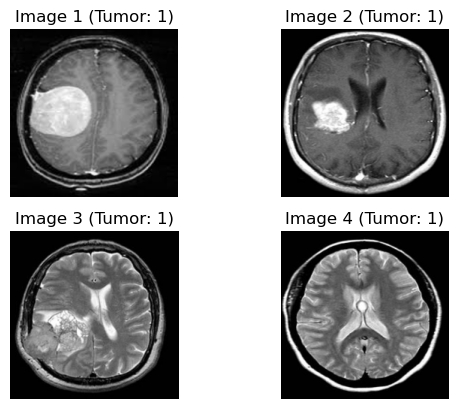

In [244]:
# Select a few images to display
sample_images = images[:4]  # Choose the first 4 images, for example

# Plot the images with labels
for i, (image, label) in enumerate(zip(sample_images, labels[:4])):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image.reshape(224, 224, 3))  # Reshape the flattened image
    plt.title(f"Image {i + 1} (Tumor: {label})")
    plt.axis("off")
plt.show()

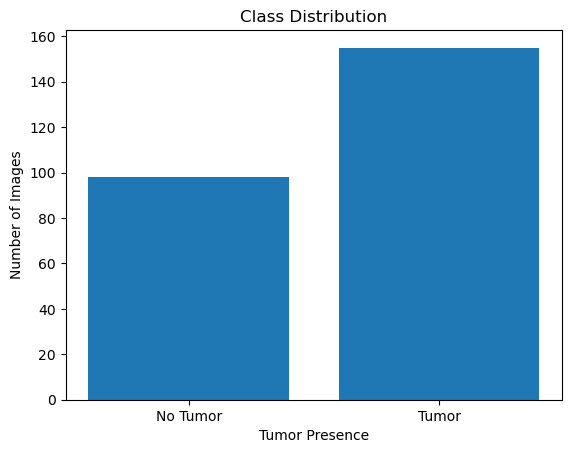

In [245]:
plt.bar(["No Tumor", "Tumor"], [labels.count(0), labels.count(1)])
plt.title("Class Distribution")
plt.xlabel("Tumor Presence")
plt.ylabel("Number of Images")
plt.show()

In [246]:
# Extract features (image pixel values)
features = data.iloc[:, 1:].values  # All columns except the first one (image ID)
target = data["label"]  # Tumor presence (1 or 0)

In [247]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

In [248]:
# Train a KNN model with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [249]:
# Evaluate model accuracy
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [250]:
accuracy = accuracy_score(y_train, y_pred)
print("Model accuracy on test set:", accuracy)

Model accuracy on test set: 1.0


In [251]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


In [252]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [253]:
# Save the trained model using joblib
joblib.dump(model, "brain_tumor_model.joblib")

['brain_tumor_model.joblib']